# Analyzing River Thames Water Levels
Time series data is everywhere, from watching your stock portfolio to monitoring climate change, and even live-tracking as local cases of a virus become a global pandemic. In this project, you’ll work with a time series that tracks the tide levels of the Thames River. You’ll first load the data and inspect it data visually, and then perform calculations on the dataset to generate some summary statistics. You’ll end by reducing the time series to its component attributes and analyzing them. 

The original dataset is available from the British Oceanographic Data Center.

Here's a map of the locations of the tidal meters along the River Thames in London.

![](locations.png)

The provided datasets are in the `data` folder in this workspace. For this project, you will work with one of these files, `10-11_London_Bridge.txt`, which contains comma separated values for water levels in the Thames River at the London Bridge. After you've finished the project, you can use your same code to analyze data from the other files (at other spots in the UK where tidal data is collected) if you'd like. 

The TXT file contains data for three variables, described in the table below. 

| Variable Name | Description | Format |
| ------------- | ----------- | ------ |
| Date and time | Date and time of measurement to GMT. Note the tide gauge is accurate to one minute. | dd/mm/yyyy hh:mm:ss |
| Water level | High or low water level measured by tide meter. Tide gauges are accurate to 1 centimetre. | metres (Admiralty Chart Datum (CD), Ordnance Datum Newlyn (ODN or Trinity High Water (THW)) | 
| Flag | High water flag = 1, low water flag = 0 | Categorical (0 or 1) |



In [27]:
import pandas as pd               
import numpy as np

#functions
def IQR(column): 
    """ Calculates the interquartile range (IQR) for a given DataFrame column using the quantile method """
    q25, q75 = column.quantile([0.25, 0.75])
    return q75-q25

#load data
water_levels_main_df = pd.read_csv("./data/10-11_London_Bridge.txt",sep=",")
water_levels_main_df.head()

,Date and time,water level (m ODN),flag,HW=1 or LW=0
0,01/05/1911 15:40:00,3.7130,1,NaN
1,02/05/1911 11:25:00,-2.9415,0,NaN
2,02/05/1911 16:05:00,3.3828,1,NaN
3,03/05/1911 11:50:00,-2.6367,0,NaN
4,03/05/1911 16:55:00,2.9256,1,NaN


In [28]:
#check types, columns
print(water_levels_main_df.dtypes)
print(water_levels_main_df.keys())
#strip the columns, there are spaces and is better to just trim it for better use later
water_levels_main_df.rename(columns={x:x.strip() for x in water_levels_main_df.columns},inplace=True)
print(water_levels_main_df.keys())


Date and time            object
 water level (m ODN)     object
 flag                     int64
 HW=1 or LW=0           float64
dtype: object
Index(['Date and time', ' water level (m ODN)', ' flag', ' HW=1 or LW=0'], dtype='object')
Index(['Date and time', 'water level (m ODN)', 'flag', 'HW=1 or LW=0'], dtype='object')


In [29]:
#check empty values
display(water_levels_main_df.isna().sum())
print(water_levels_main_df.shape) #discovered that a column is completely empty

Date and time               0
water level (m ODN)         0
flag                        0
HW=1 or LW=0           115503
dtype: int64

(115503, 4)


In [30]:
#create new data frame without useless column HW...
water_levels_df = water_levels_main_df.drop("HW=1 or LW=0",axis=1)
display(water_levels_df.head())

,Date and time,water level (m ODN),flag
0,01/05/1911 15:40:00,3.7130,1
1,02/05/1911 11:25:00,-2.9415,0
2,02/05/1911 16:05:00,3.3828,1
3,03/05/1911 11:50:00,-2.6367,0
4,03/05/1911 16:55:00,2.9256,1


In [31]:
#set correct types to columns
water_levels_df["Date and time"] = pd.to_datetime(water_levels_df["Date and time"],dayfirst=True)
water_levels_df["water level (m ODN)"] = water_levels_df["water level (m ODN)"].astype("float")
water_levels_df.rename(columns={"water level (m ODN)":"water_level"}, inplace=True)
display(water_levels_df.dtypes)
#setting useful date columns
water_levels_df["year"] = water_levels_df["Date and time"].dt.year
water_levels_df["month"] = water_levels_df["Date and time"].dt.month
water_levels_df["day"] = water_levels_df["Date and time"].dt.day
display(water_levels_df.head())

Date and time    datetime64[ns]
water_level             float64
flag                      int64
dtype: object

,Date and time,water_level,flag,year,month,day
0,1911-05-01 15:40:00,3.7130,1,1911,5,1
1,1911-05-02 11:25:00,-2.9415,0,1911,5,2
2,1911-05-02 16:05:00,3.3828,1,1911,5,2
3,1911-05-03 11:50:00,-2.6367,0,1911,5,3
4,1911-05-03 16:55:00,2.9256,1,1911,5,3


# Separating high- and low-tide summary statistics in different dataframes

In [32]:
#grouping high-tide
high_tide_df = water_levels_df[water_levels_df["flag"] == 1]
high_tide_summary = high_tide_df["water_level"].agg(["mean","median",IQR])
display(high_tide_df.head())
print(high_tide_summary)

#grouping low-tide
low_tide_df = water_levels_df[water_levels_df["flag"] == 0]
low_tide_summary = low_tide_df["water_level"].agg(["mean","median",IQR])
display(low_tide_df.head())
print(low_tide_summary)

,Date and time,water_level,flag,year,month,day
0,1911-05-01 15:40:00,3.7130,1,1911,5,1
2,1911-05-02 16:05:00,3.3828,1,1911,5,2
4,1911-05-03 16:55:00,2.9256,1,1911,5,3
6,1911-05-04 17:45:00,3.1542,1,1911,5,4
7,1911-05-05 06:30:00,3.0780,1,1911,5,5


mean      3.318373
median    3.352600
IQR       0.743600
Name: water_level, dtype: float64


,Date and time,water_level,flag,year,month,day
1,1911-05-02 11:25:00,-2.9415,0,1911,5,2
3,1911-05-03 11:50:00,-2.6367,0,1911,5,3
5,1911-05-04 12:10:00,-2.4843,0,1911,5,4
8,1911-05-05 13:00:00,-2.4843,0,1911,5,5
10,1911-05-06 14:25:00,-1.9509,0,1911,5,6


mean     -2.383737
median   -2.412900
IQR       0.538200
Name: water_level, dtype: float64


# Calculating annual percentage of days with very high tide levels (90th percentile) and very low-tide days (10th percentile) for each year 

In [33]:
#finding 90th quantile for high days
high_percentile = high_tide_df["water_level"].quantile(0.9)
#low percentile 10th quantile
low_percentile = low_tide_df["water_level"].quantile(0.1)

In [34]:
#total number of high tide days per year
htide_peryear = high_tide_df.groupby("year")["water_level"].count()
print(htide_peryear)
#total number of very high tide days per year
vhtide_peryear = high_tide_df[high_tide_df["water_level"] > high_percentile].groupby("year")["water_level"].count()
print(vhtide_peryear)
#percentage of high tide levels
hratio_df = (vhtide_peryear/htide_peryear).reset_index()
print(hratio_df.dtypes)

year
1911    244
1912    557
1913    669
1914    687
1915    666
       ... 
1991    706
1992    707
1993    699
1994    705
1995    705
Name: water_level, Length: 85, dtype: int64
year
1911      1
1912     18
1913     55
1914     38
1915     30
       ... 
1991     68
1992     73
1993    102
1994    106
1995    120
Name: water_level, Length: 85, dtype: int64
year             int32
water_level    float64
dtype: object


In [35]:
#total number of low tide days per year
ltide_peryear = low_tide_df.groupby("year")["water_level"].count()
print(ltide_peryear)
#total number of very low tide days per year
vltide_peryear = low_tide_df[low_tide_df["water_level"] < low_percentile].groupby("year")["water_level"].count()
print(vltide_peryear)
#percentage of high tide levels
lratio_df = (vltide_peryear/ltide_peryear).reset_index()
print(lratio_df,lratio_df.dtypes)

year
1911    231
1912    555
1913    670
1914    692
1915    658
       ... 
1991    705
1992    707
1993    701
1994    705
1995    705
Name: water_level, Length: 85, dtype: int64
year
1911     14
1912     37
1913     15
1914     27
1915     22
       ... 
1991    106
1992     76
1993     79
1994     75
1995     76
Name: water_level, Length: 85, dtype: int64
    year  water_level
0   1911     0.060606
1   1912     0.066667
2   1913     0.022388
3   1914     0.039017
4   1915     0.033435
..   ...          ...
80  1991     0.150355
81  1992     0.107496
82  1993     0.112696
83  1994     0.106383
84  1995     0.107801

[85 rows x 2 columns] year             int32
water_level    float64
dtype: object


# Dictionary with summary of Data Analysis

In [36]:
solution ={"high_statistics":high_tide_summary,"low_statistics":low_tide_summary,"very_high_ratio":hratio_df,"very_low_ratio":lratio_df}

# Some visualizations of the resulting data

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# Some Hypothesis

1. Due to climate change, the average water level of the river has increased over the years.


<Axes: title={'center': 'Mean and Median of High Tide Levels per Year'}, xlabel='year'>

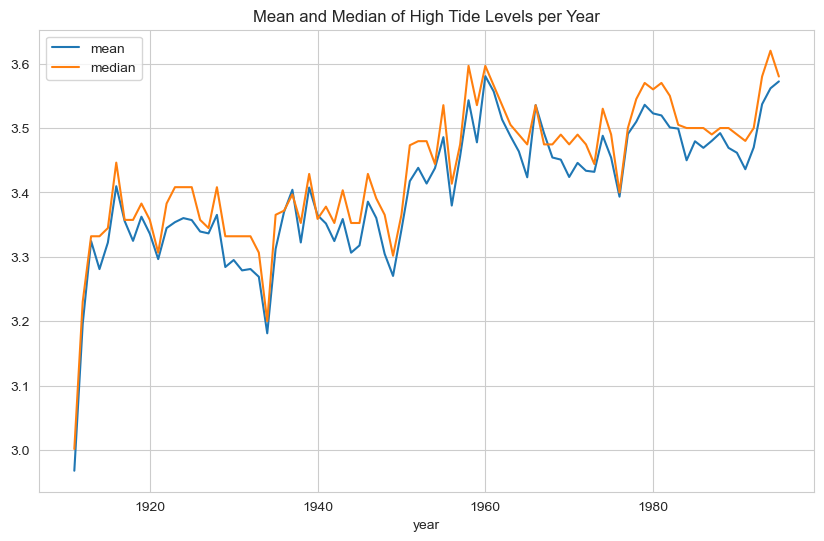

In [60]:
#delete duplicates (we will only use the highest value of the day,
#if there is another record in the same day but different hour it will be deleted) we will use the highest value
daily_high_tide = high_tide_df.sort_values("water_level",ascending=False).drop_duplicates(["year","month","day"])
daily_low_tide = low_tide_df.sort_values("water_level").drop_duplicates(["year","month","day"])
#mean and median of high tide levels per year
daily_high_tide.groupby("year")["water_level"].agg(["mean","median"]).plot(kind="line",title="Mean and Median of High Tide Levels per Year")

We can see in the graph above that, in average and median, the highest water levels have increaded over the years. This could be to several factors, like climate change, construction of new buildings, etc.

2. The water level of the river is influenced by the season of the year.

,Date and time,water_level,flag,year,month,day,season
0,1911-05-01 15:40:00,3.7130,1,1911,5,1,0
1,1911-05-02 11:25:00,-2.9415,0,1911,5,2,0
2,1911-05-02 16:05:00,3.3828,1,1911,5,2,0
3,1911-05-03 11:50:00,-2.6367,0,1911,5,3,0
4,1911-05-03 16:55:00,2.9256,1,1911,5,3,0


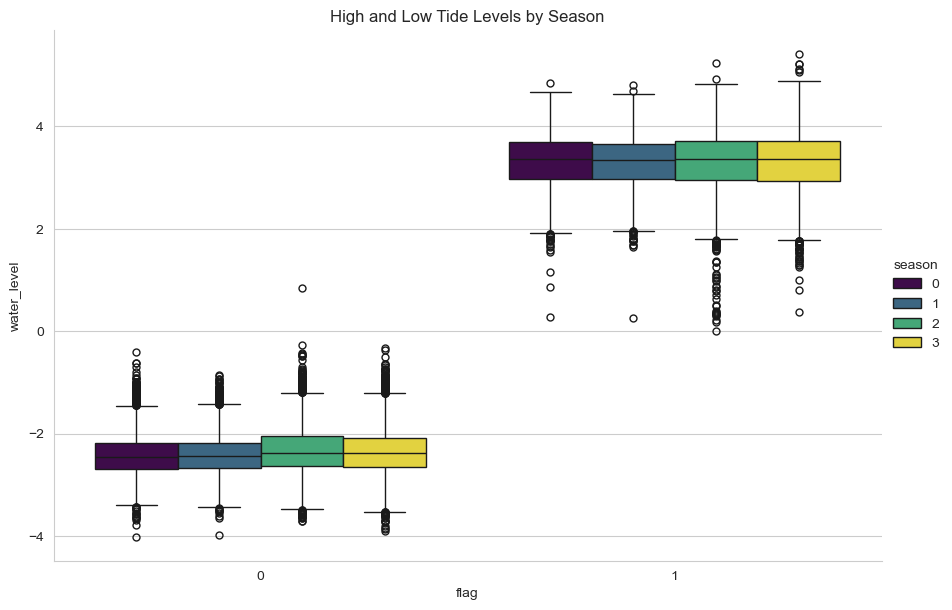

In [ ]:
#seasons from ranges 21st of March to 20th of June is spring, 21st of June to 20th of September is summer, 21st of September to 20th of December is autumn, 21st of December to 20th of March is winter
def season_of_year(date_time):
    if date_time.month == 3 and date_time.day >= 21:
        return 0
    elif date_time.month == 4 or date_time.month == 5:
        return 0
    elif date_time.month == 6 and date_time.day <= 20:
        return 0
    elif date_time.month == 6 and date_time.day >= 21:
        return 1
    elif date_time.month == 7 or date_time.month == 8:
        return 1
    elif date_time.month == 9 and date_time.day <= 20:
        return 1
    elif date_time.month == 9 and date_time.day >= 21:
        return 2
    elif date_time.month == 10 or date_time.month == 11:
        return 2
    elif date_time.month == 12 and date_time.day <= 20:
        return 2
    else:
        return 3
    

#adding columns of seasons with the function
water_levels_df["season"] = water_levels_df["Date and time"].apply(season_of_year)
display(water_levels_df.head())

#0 is spring, 1 is summer, 2 is autumn, 3 is winter
sns.catplot(data=water_levels_df,x="flag",y="water_level",hue="season",kind="box",height=6,aspect=1.5)
plt.title("High and Low Tide Levels by Season")
plt.show()




<!-- 0 is spring, 1 is summer, 2 is autumn, 3 is winter -->
As we can see in the boxplot above, the water level of the river is influenced by the season of the year. The average and highest points are slightly remarkable on autumn. This month is usually the rainiest month in London, which could explain the higher water levels. We can see that summer and spring have the lowest water levels.

In conclusion, the water level of the river is influenced by the season of the year, and the average water level of the river has increased over the years.